In [3]:
import pandas as pd
import matplotlib. pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn. metrics import r2_score

from sklearn. linear_model import LinearRegression

In [8]:
df = pd. read_csv("/content/realest.csv" )
df. head (10)

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0
5,44.0,4.0,897.0,7.0,25.0,960.0,2.0,1.0,0.0
6,49.0,5.0,1400.0,8.0,NaN,678.0,1.0,1.0,1.0
7,70.0,3.0,2261.0,6.0,29.0,2700.0,1.0,2.0,0.0
8,72.0,4.0,1290.0,8.0,NaN,800.0,1.5,1.5,0.0
9,82.0,4.0,2104.0,9.0,40.0,1038.0,2.5,1.0,1.0


In [9]:
df. describe()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
count,156.000000,156.000000,146.000000,156.000000,146.000000,147.000000,156.000000,156.000000,156.000000
mean,56.474359,3.166667,1097.246575,6.500000,32.808219,911.707483,1.480769,0.846154,0.230769
std,12.875307,1.348037,462.540698,1.675247,8.457859,443.263430,0.529408,0.808454,0.422682
min,32.000000,1.000000,539.000000,4.000000,24.000000,418.000000,1.000000,0.000000,0.000000
25%,46.000000,2.000000,805.250000,5.000000,25.000000,652.500000,1.000000,0.000000,0.000000
50%,55.000000,3.000000,965.500000,6.000000,30.000000,821.000000,1.500000,1.000000,0.000000
75%,65.000000,4.000000,1220.500000,7.000000,37.000000,1012.500000,2.000000,1.500000,0.000000
max,90.000000,8.000000,2295.000000,12.000000,50.000000,2752.000000,3.000000,2.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      156 non-null    float64
 1   Bedroom    156 non-null    float64
 2   Space      146 non-null    float64
 3   Room       156 non-null    float64
 4   Lot        146 non-null    float64
 5   Tax        147 non-null    float64
 6   Bathroom   156 non-null    float64
 7   Garage     156 non-null    float64
 8   Condition  156 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


In [11]:
df.isnull(). sum()

,0
Price,1
Bedroom,1
Space,11
Room,1
Lot,11
Tax,10
Bathroom,1
Garage,1
Condition,1


In [13]:
df. duplicated(). sum()

0

In [14]:
df

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0
...,...,...,...,...,...,...,...,...,...
152,44.0,3.0,820.0,5.0,27.0,NaN,1.0,0.0,1.0
153,43.0,2.0,593.0,4.0,30.0,465.0,2.0,1.0,0.0
154,53.0,3.0,716.0,6.0,30.0,585.0,1.0,2.0,1.0
155,62.0,4.0,951.0,7.0,30.0,895.0,2.0,1.0,0.0


<Axes: xlabel='Price', ylabel='Space'>

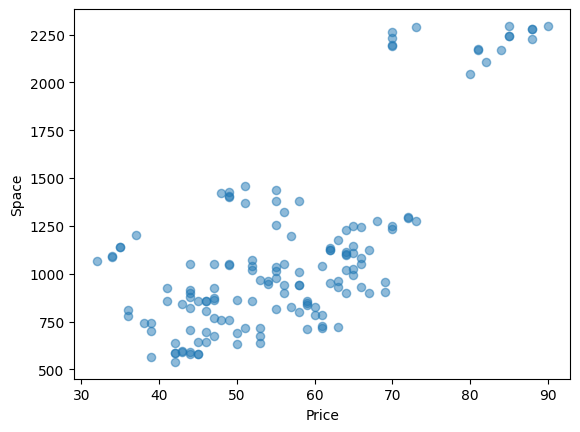

In [29]:
df.plot(kind='scatter', x='Price', y='Space', s=35, alpha=0.5)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '3.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '4.0'),
  Text(3, 0, '5.0'),
  Text(4, 0, '1.0'),
  Text(5, 0, '8.0'),
  Text(6, 0, '7.0')])

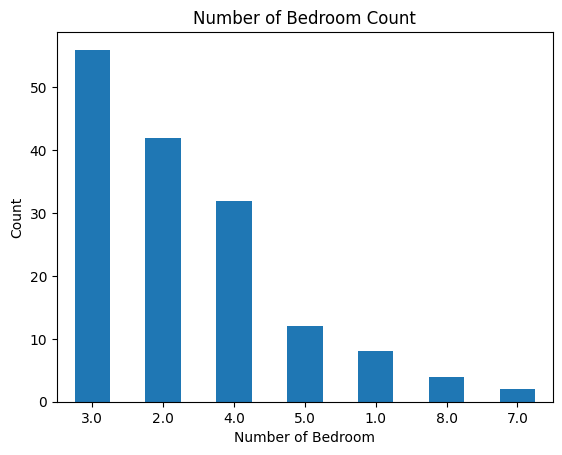

In [33]:
Bedroom_count = df[ 'Bedroom'].value_counts ( )
Bedroom_count. plot (kind='bar')
plt. title('Number of Bedroom Count')
plt. xlabel( 'Number of Bedroom')

plt. ylabel( 'Count' )
plt. xticks(rotation=0)

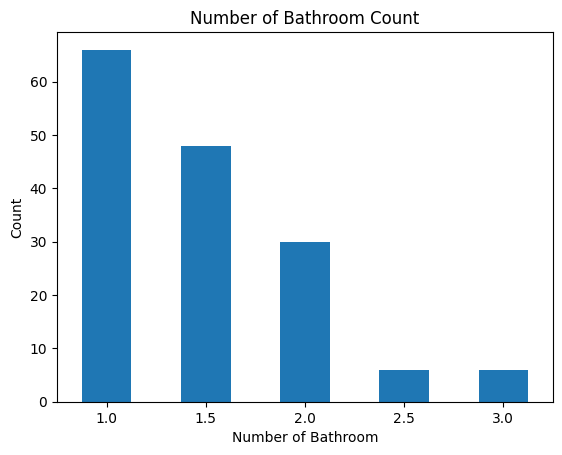

In [34]:
Bathroom_count = df [ 'Bathroom']. value_counts()
Bathroom_count_sorted = Bathroom_count.sort_index()
Bathroom_count_sorted. plot(kind='bar')
plt. title( 'Number of Bathroom Count' )
plt. xlabel( 'Number of Bathroom')
plt. ylabel( 'Count' )
plt .xticks(rotation=0)
plt. show()

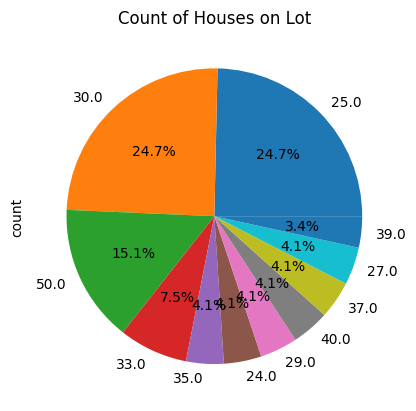

In [36]:
Lot_count = df['Lot'].value_counts()
Lot_count.plot(kind='pie', autopct='%1.1f%%')
plt.title('Count of Houses on Lot')
plt.show()

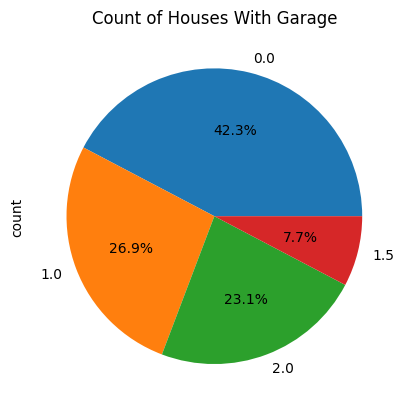

In [38]:
Garage_count = df['Garage'].value_counts()
Garage_count.plot(kind='pie', autopct='%1.1f%%')
plt.title('Count of Houses With Garage')
plt.show()

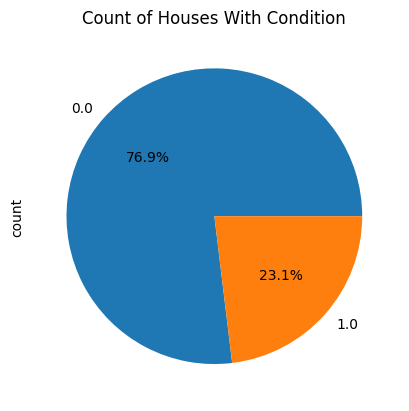

In [50]:
encoder = LabelEncoder()

In [53]:
encoding_col = ['Price', 'Bedroom','Space', 'Room', 'Lot', 'Tax', 'Bathroom', 'Garage', 'Condition']
for col in encoding_col:
 df[col]=encoder. fit_transform(df [col])

In [55]:
df

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,19,1,69,1,8,32,1,0,0
1,21,1,37,1,5,101,0,3,1
2,22,2,53,1,6,82,1,1,0
3,24,2,72,2,0,92,1,3,0
4,30,2,88,3,10,109,1,2,0
...,...,...,...,...,...,...,...,...,...
152,10,2,38,1,2,138,0,0,1
153,9,1,8,0,4,4,2,1,0
154,19,2,24,2,4,23,0,3,1
155,28,3,65,3,4,81,2,1,0


In [58]:
x=df. drop (columns=['Price'],axis = 1)
y=df['Price']

In [62]:
y

array([[0.40425532],
       [0.44680851],
       [0.46808511],
       [0.5106383 ],
       [0.63829787],
       [0.21276596],
       [0.31914894],
       [0.76595745],
       [0.80851064],
       [0.89361702],
       [0.93617021],
       [0.23404255],
       [0.27659574],
       [0.31914894],
       [0.46808511],
       [0.55319149],
       [0.59574468],
       [0.63829787],
       [0.68085106],
       [0.04255319],
       [0.10638298],
       [0.19148936],
       [0.25531915],
       [0.25531915],
       [0.34042553],
       [0.65957447],
       [0.42553191],
       [0.5106383 ],
       [0.5106383 ],
       [0.57446809],
       [0.59574468],
       [0.25531915],
       [0.31914894],
       [0.76595745],
       [0.80851064],
       [0.87234043],
       [0.95744681],
       [0.23404255],
       [0.27659574],
       [0.27659574],
       [0.44680851],
       [0.57446809],
       [0.63829787],
       [0.65957447],
       [0.63829787],
       [0.04255319],
       [0.06382979],
       [0.170

In [64]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y.reshape(-1, 1))

In [65]:
y

array([[0.40425532],
       [0.44680851],
       [0.46808511],
       [0.5106383 ],
       [0.63829787],
       [0.21276596],
       [0.31914894],
       [0.76595745],
       [0.80851064],
       [0.89361702],
       [0.93617021],
       [0.23404255],
       [0.27659574],
       [0.31914894],
       [0.46808511],
       [0.55319149],
       [0.59574468],
       [0.63829787],
       [0.68085106],
       [0.04255319],
       [0.10638298],
       [0.19148936],
       [0.25531915],
       [0.25531915],
       [0.34042553],
       [0.65957447],
       [0.42553191],
       [0.5106383 ],
       [0.5106383 ],
       [0.57446809],
       [0.59574468],
       [0.25531915],
       [0.31914894],
       [0.76595745],
       [0.80851064],
       [0.87234043],
       [0.95744681],
       [0.23404255],
       [0.27659574],
       [0.27659574],
       [0.44680851],
       [0.57446809],
       [0.63829787],
       [0.65957447],
       [0.63829787],
       [0.04255319],
       [0.06382979],
       [0.170

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [69]:
_model = LinearRegression()
_model.fit(x_train, y_train)

LinearRegression()

In [72]:
y_pred = _model.predict(x_test)

In [73]:
y_pred

array([[0.17478479],
       [0.22215106],
       [0.60997223],
       [0.67910485],
       [0.73571423],
       [0.6113466 ],
       [0.70194266],
       [0.28739656],
       [0.46561   ],
       [0.85905829],
       [0.29651528],
       [0.81300422],
       [0.26927842],
       [0.65735432],
       [0.42971736],
       [0.69787277],
       [0.24627427],
       [0.70397429],
       [0.47838988],
       [0.23591759],
       [0.32808683],
       [0.48836669],
       [0.20768301],
       [0.76766323],
       [0.5105255 ],
       [0.598808  ],
       [0.56475579],
       [0.45186946],
       [0.18901403],
       [0.1452249 ],
       [0.39667316],
       [0.44615576]])

In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [80]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [81]:
mse

0.029614864017703763

In [82]:
mae

0.1530759167688902

In [83]:
In_acc= r2_score (y_test, y_pred)
In_acc

0.5422102052464928